# Kepler candidates dataset Exploratory Data Analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('cumulative.csv')

In [3]:
data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [4]:
data.columns

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

## Figures


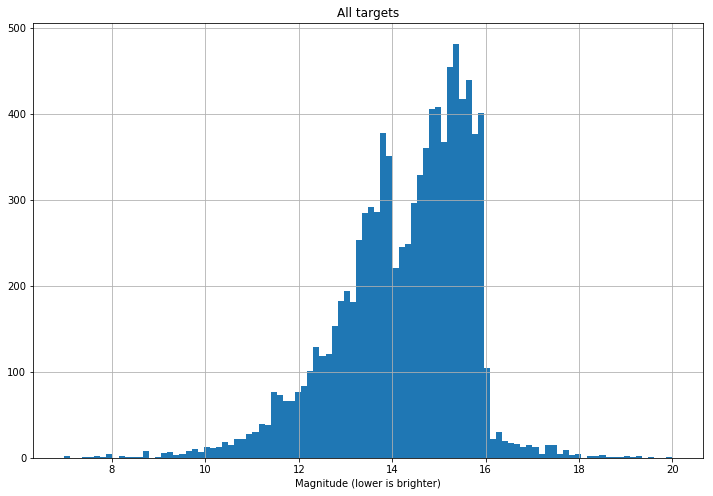

In [5]:
ax = data.koi_kepmag.hist(bins=100, figsize=(12, 8))
ax.set_xlabel("Magnitude (lower is brighter)")
ax.set_title("All targets")

We see what looks like a bi-modal distribution and a sharp cut-off at around 16th magnitude. This is likely the limit at which the noise becomes too much to detect planetary candidates.

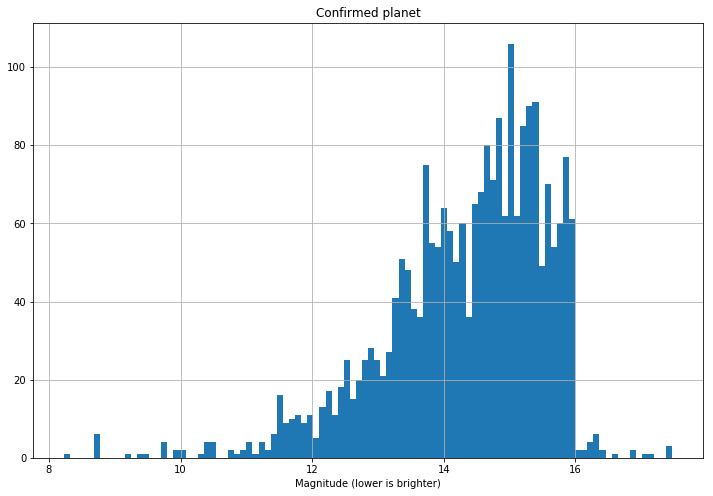

In [6]:
# only the Confirmed planets
ax = data[data.koi_disposition == 'CONFIRMED'].koi_kepmag.hist(bins=100, figsize=(12, 8))
ax.set_xlabel("Magnitude (lower is brighter)")
ax.set_title("Confirmed planet")

### Surface Gravity of Stars


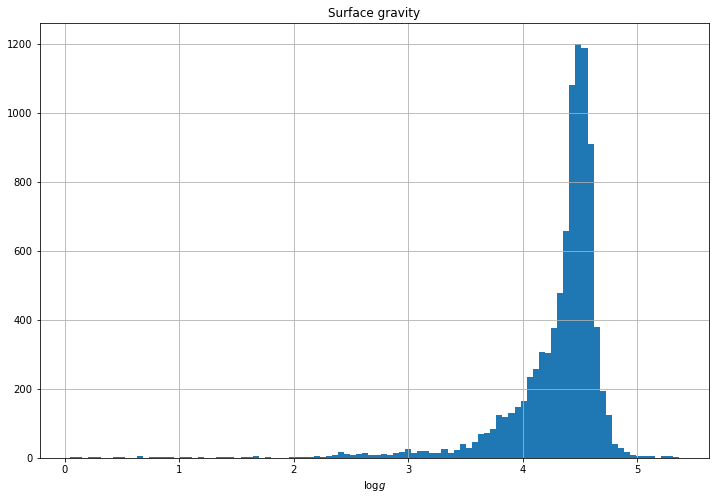

In [7]:
ax = data.koi_slogg.hist(bins=100, figsize=(12, 8))
ax.set_xlabel("$\log{g}$")
ax.set_title("Surface gravity")

### Right Ascension and Declination


In [8]:
confirmed = data[data.koi_disposition == 'CONFIRMED']

ra, dec = data.ra, data.dec
ra_c, dec_c = confirmed.ra, confirmed.dec

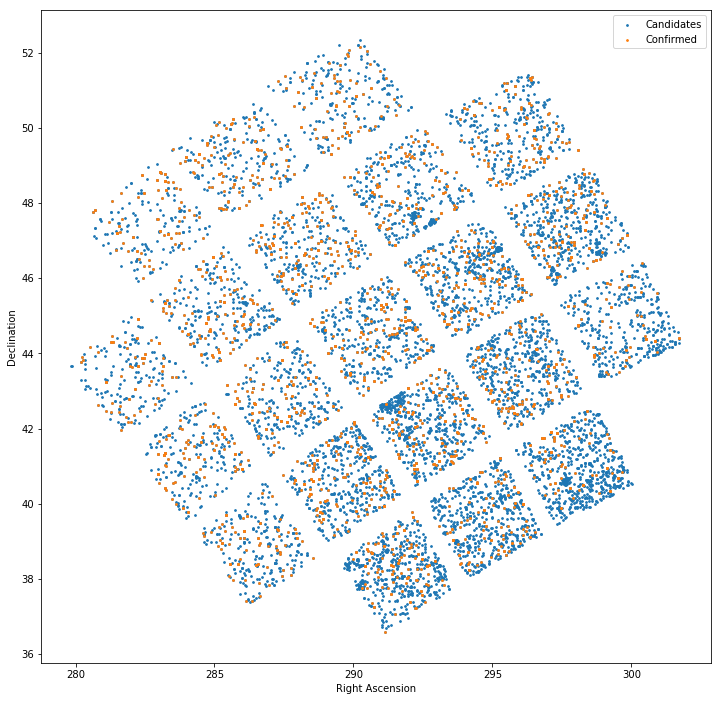

In [9]:
fig = plt.figure(figsize=(12, 12))

plt.scatter(ra, dec, s=3, label='Candidates')
plt.scatter(ra_c, dec_c, s=3, label="Confirmed")

plt.xlabel("Right Ascension")
plt.ylabel("Declination")

plt.legend()

### Orbital periods of confirmed planets


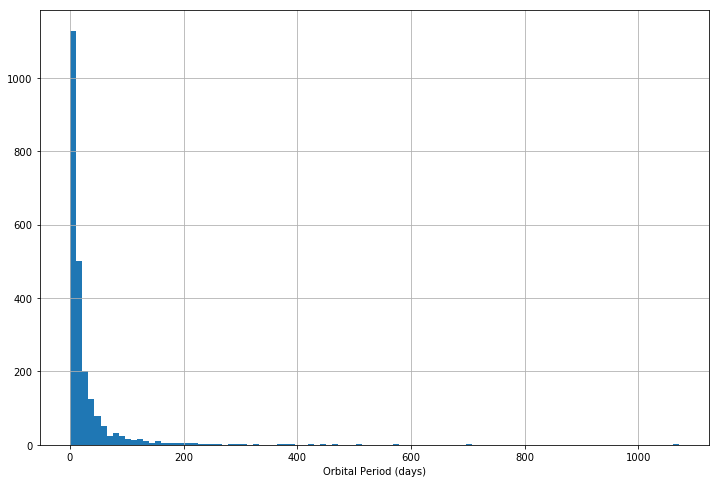

In [10]:
ax = confirmed.koi_period.hist(bins=100, figsize=(12, 8))
ax.set_xlabel("Orbital Period (days)")

Most confirmed planets have lower orbital periods. This makes sense, the closer the planet is to its parent star, the more likely it is to eclipse it (and hence the more likely it is to be observed.)

### Duration of planetary transits

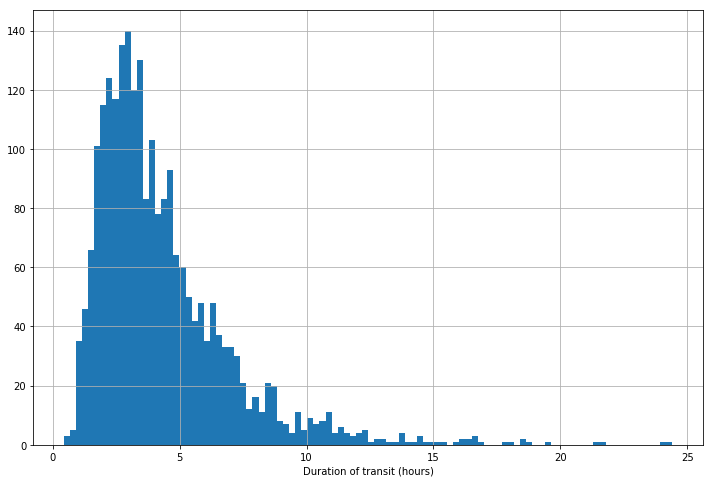

In [11]:
ax = confirmed.koi_duration.hist(bins=100, figsize=(12, 8))
ax.set_xlabel("Duration of transit (hours)")

Durations are on the order of hours, with more detections at smaller hours, again showing the detection bias towards smaller orbits.

### Temperatures and Radii of stars and planets


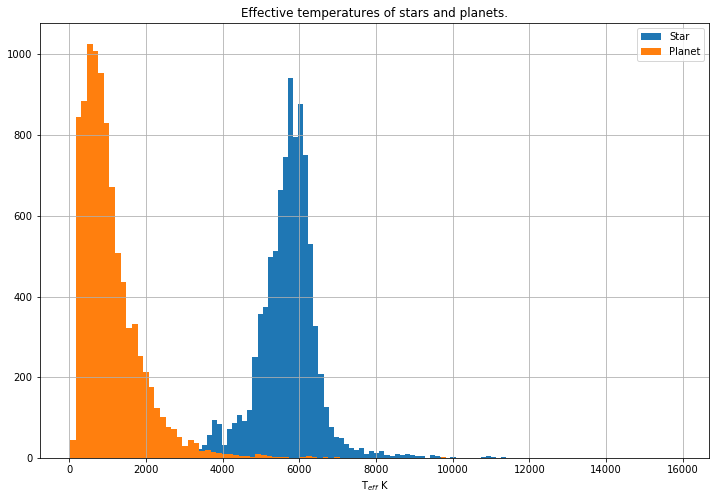

In [12]:
ax = data.koi_steff.hist(bins=100, figsize=(12, 8), label="Star")
ax.set_xlabel("T$_{eff}$ K")
ax.set_title("Effective temperatures of stars and planets.")

data.koi_teq.hist(ax=ax, bins=100, label='Planet')
ax.legend()

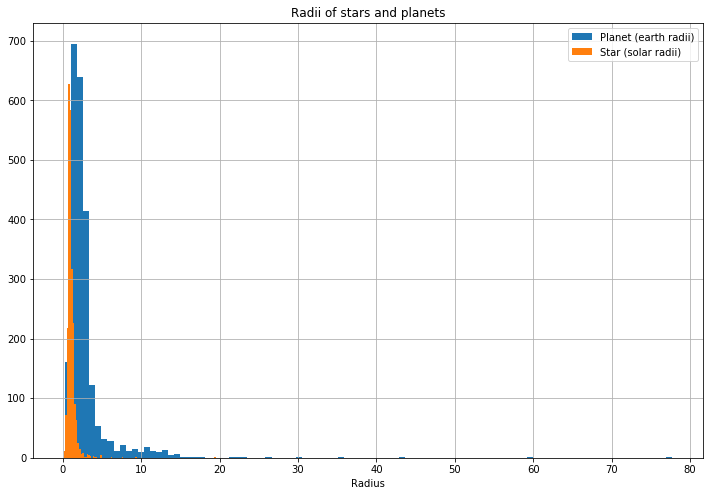

In [13]:
# radius only for stars with a confirmed planet, the rest is not known.
ax = confirmed.koi_prad.hist(bins=100, label='Planet (earth radii)')
ax.set_title("Radii of stars and planets")

confirmed.koi_srad.hist(ax=ax, bins=100, figsize=(12, 8), label="Star (solar radii)")
ax.set_xlabel("Radius")
ax.legend()
